# Optimization algorithms

I want to know which ambulance to send. 

- Travel time: lower = benefit single case
- Coverage disruption = drop in % for primary and secondary

All the bases:


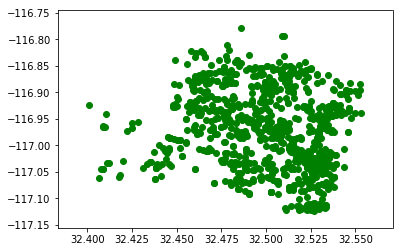

Every single call:


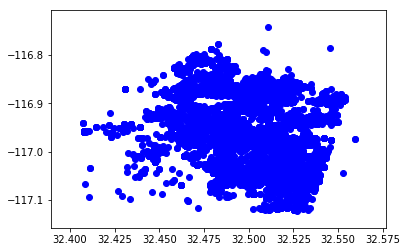

Clustered calls represented by 10 points:


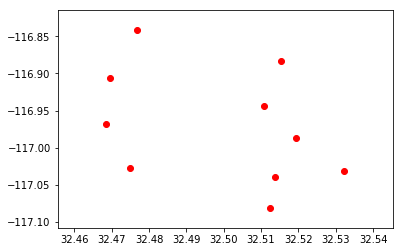

Overlay the demand points by the clustered demand points:


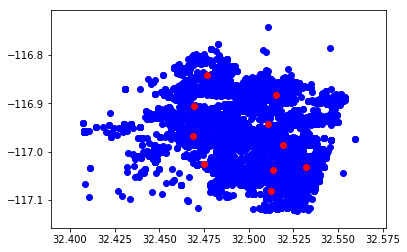

Overlay the bases by the clustered demand points:


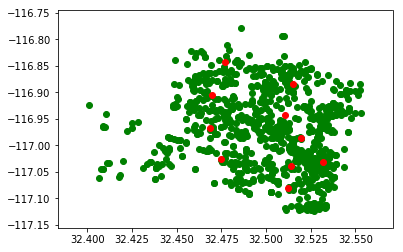

 I did not remove the redundant Mexico City data yet. 


In [1]:
from execute import initial
initial(run=True)

Next Step will probably be to write a function that returns the best estimate time traveled between base --> nearest demand point. 

## Step 1: set coverage algorithm

a) through k-means, find a set of 8 ambulances that has all of Tijuana covered by primary

For each representative call point, find the bases. 

[  32.53073354 -117.02382395]  with distance of 0.6


([32.530711, -117.010811, 37], 0.009892436263651615)
([32.531146, -117.02392, 222], 0.046621378832292795)
([32.531232, -117.023847, 787], 0.055319229873545595)
([32.531477, -117.024998, 221], 0.13770469979241018)
([32.532129, -117.024808, 50], 0.18026106439861667)
([32.531437, -117.026238, 41], 0.23982905543345465)
([32.529562, -117.013966, 800], 0.318253267281444)
([32.534032, -117.021852, 217], 0.4100210311116839)
([32.534414, -117.02286, 218], 0.41807356157825626)
([32.532017, -117.028623, 35], 0.4727761573493493)
([32.532486, -117.0189, 772], 0.501740383669864)
([32.535417, -117.023835, 44], 0.5193783872081685)
([32.535545, -117.024612, 399], 0.5386834295006774)
([32.526897, -117.00665, 383], 0.5857475809313174)


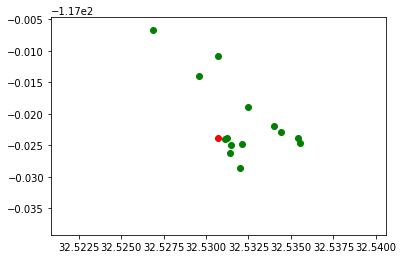

----------------------------------------
[  32.51468799 -117.039629  ]  with distance of 0.6


([32.513935, -117.044452, 208], 0.3169024091319443)
([32.512478, -117.039091, 837], 0.3212500042769514)
([32.512478, -117.039091, 835], 0.3212500042769514)
([32.512478, -117.039091, 755], 0.3212500042769514)
([32.515488, -117.044419, 205], 0.45873382206706304)
([32.510659, -117.04287, 760], 0.4790764056812289)


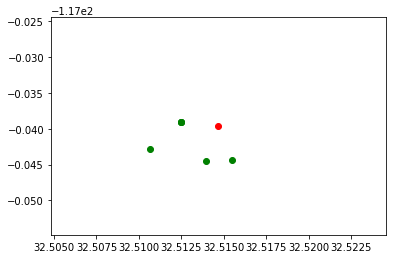

----------------------------------------
[  32.51357217 -117.08146146]  with distance of 0.6


([32.51525, -117.08327, 356], 0.25198677638613953)
([32.515102, -117.084326, 323], 0.31816263210806345)
([32.513326, -116.866915, 102], 0.4445068396010417)
([32.509222, -116.861991, 272], 0.4916607628922545)
([32.508536, -116.86279, 105], 0.570045150384852)
([32.511504, -116.867855, 839], 0.5823139847661336)
([32.515496, -117.075643, 737], 0.5868643479889974)
([32.515554, -117.075588, 355], 0.5940309632043532)


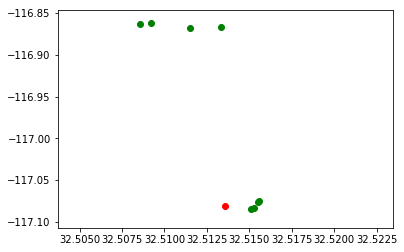

----------------------------------------
[  32.47651421 -116.82695097]  with distance of 0.6


([32.476446, -117.03035, 572], 0.07167539278611174)
([32.475578, -117.03158, 513], 0.12436378233053241)
([32.474729, -117.027797, 512], 0.3733790865169701)
([32.476441, -117.026791, 570], 0.4041179456018361)
([32.477827, -116.831949, 640], 0.4918557885532727)


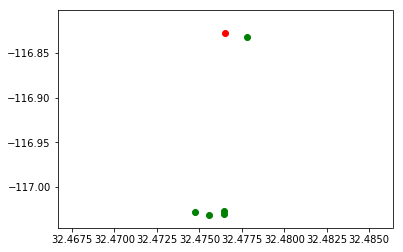

----------------------------------------
[  32.46977799 -116.98003047]  with distance of 0.6


([32.471546, -116.977932, 652], 0.2781310631044641)
([32.471546, -116.977932, 887], 0.2781310631044641)
([32.47233, -116.978205, 888], 0.3309696098387161)


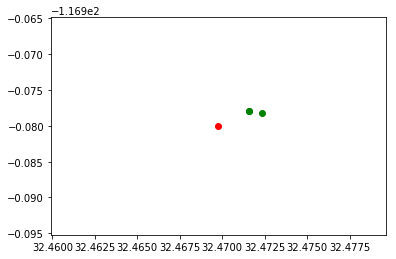

----------------------------------------
[  32.48887044 -116.87512518]  with distance of 0.6


([32.488733, -117.00727, 605], 0.5267696658229963)
([32.488839, -117.006637, 377], 0.5854790250987297)


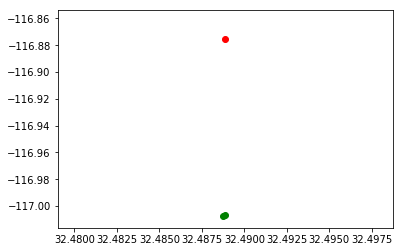

----------------------------------------
[  32.47001555 -116.93242187]  with distance of 0.6


([32.472261, -116.934128, 950], 0.2961920099220025)
([32.474029, -116.932127, 536], 0.44593400554926127)
([32.471742, -116.936873, 532], 0.46015724028074656)
([32.474785, -116.932405, 949], 0.5289107424873916)
([32.468865, -116.971533, 919], 0.5353801535182507)


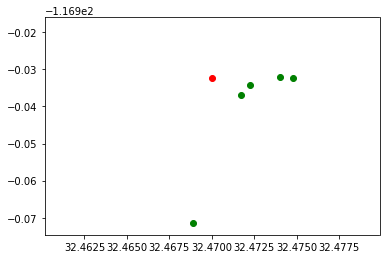

----------------------------------------
[  32.51292075 -116.97198718]  with distance of 0.6




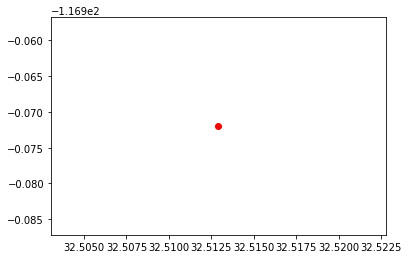

----------------------------------------
[  32.52504937 -116.91680178]  with distance of 0.6


([32.525246, -116.916049, 828], 0.07400918431092991)
([32.52387, -116.855962, 457], 0.14084093311658158)
([32.524961, -116.854513, 560], 0.15493499135493166)
([32.522228, -116.858525, 562], 0.39160959096827685)


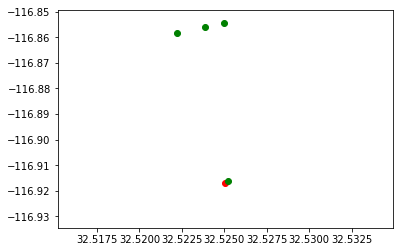

----------------------------------------
[  32.47952243 -117.0346086 ]  with distance of 0.6


([32.480485, -117.033629, 875], 0.14097154478780075)
([32.480081, -117.036219, 138], 0.163557620402963)
([32.4804, -117.032089, 874], 0.2560508979188732)
([32.482763, -117.033887, 454], 0.3657086103537446)
([32.483437, -117.033986, 453], 0.4380339367530463)
([32.482891, -117.030895, 286], 0.5112647054561859)
([32.482046, -117.039539, 877], 0.5413828886313675)
([32.484567, -117.033825, 836], 0.5642467161176632)


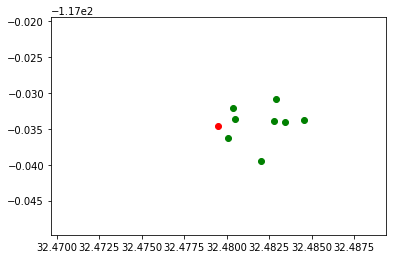

----------------------------------------


In [2]:
from execute import find_starting_set
find_starting_set(run=True)

b) find the set of 8 that covers all primary and maximized the secondary coverage. 
- After having the set of all base combinations that satisfied r1 = 10, find the set with the highest percentage covered by r2=14

## Step 2: where the fun is

a) Find the travel times of each of the 8 ambulances, through lookup or query

b) Find the set disruption each ambulance would cause, as a result of r1 and r2. Include severity as a parameter. 
Coverage = Primary Coverage + Secondary Coverage 

## Step 3: 

a) Implement the dynamic, iterative case. 

## Various TODOs

- Add background image: https://stackoverflow.com/questions/15160123/adding-a-background-image-to-a-plot-with-known-corner-coordinates

- Remove redundant Mexico City information